## Scope of ploblem statement

Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

- understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:<br>

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Model Selection using RFE & Manual elimination Method (Bike Sharing Case Study)

### Data Understanding and preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading and Under standing the data

In [3]:
Bike_df = pd.read_csv('day.csv')

In [4]:
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# analyse the data frame

In [6]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Null values are not present int the data set
- season,yr,mnth,holiday,weekday,workinkday and weathersit categorical variables indicated in numbers convert to categorical  variable lable names.
- instant, dteday are wont contribute to Model hence remove them
- cnt: count of total rental bikes including both casual and registered i.e these are part of target variable hence remove them.

In [7]:
Bike_df.drop(Bike_df[['instant', 'dteday','casual','registered']], axis=1 , inplace = True)

In [8]:
# analyse the variable season  

In [9]:
Bike_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [10]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter) convert to categorical variable label

In [11]:
def season(x) :
    if x==1 :
        return 'spring'
    elif x==2 :
        return 'summer'
    elif x==3 :
        return 'fall'
    elif x==4 :
        return 'winter'


In [12]:
Bike_df.season = Bike_df['season'].apply(season)

In [13]:
#verify the season data frame

In [14]:
Bike_df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [15]:
# analyse the variable year

In [16]:
Bike_df.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [17]:
#- yr : year (0: 2018, 1:2019) convert to categorical variable label

In [18]:
def year(x) :
    if x==0 :
        return 2018
    elif x==1 :
        return 2019
    

In [19]:
Bike_df.yr = Bike_df['yr'].apply(year)

In [20]:
#verify the year data frame

In [21]:
Bike_df.yr.value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [22]:
# analyse the variable month

In [23]:
Bike_df.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [24]:
#- mnth : month ( 1 to 12) convert to categorical variable label

In [25]:
M= ['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec']
def month(x) :
    for i in range(1,13) :
        if x==i :
            return M[i-1]
    

In [26]:
Bike_df.mnth = Bike_df['mnth'].apply(month)

In [27]:
#verify the month data frame

In [28]:
Bike_df.mnth.value_counts()

mnth
jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: count, dtype: int64

In [29]:
# analyse the variable weekday

In [30]:
Bike_df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [31]:
#- weekday : day of the week convert to categorical variable label

In [32]:
W= ['mon','tue','wed','thu','fri','sat','sun']
def Day(x) :
    for i in range(0,7) :
        if x==i :
            return W[i]
    

In [33]:
Bike_df.weekday = Bike_df['weekday'].apply(Day)

In [34]:
#verify the weekday data frame

In [35]:
Bike_df.weekday.value_counts()

weekday
sun    105
mon    105
tue    105
wed    104
fri    104
sat    104
thu    103
Name: count, dtype: int64

In [36]:
# analyse the variable holiday

In [37]:
Bike_df.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [38]:
#- holiday : weather day is a holiday or not convert to categorical variable label

In [39]:
def company_Holiday(x) :
    if x==0 :
        return 'Not'
    elif x==1 :
        return 'Holiday'
    

In [40]:
Bike_df.holiday = Bike_df['holiday'].apply(company_Holiday)

In [41]:
#verify the holiday data frame

In [42]:
Bike_df.holiday.value_counts()

holiday
Not        709
Holiday     21
Name: count, dtype: int64

In [43]:
# analyse the variable workingday

In [44]:
Bike_df.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [45]:
#- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. convert to categorical variable label

In [46]:
def Working(x) :
    if x==0 :
        return 'Holiday'
    elif x==1 :
        return 'Workingday'
    

In [47]:
Bike_df.workingday = Bike_df['workingday'].apply(Working)

In [48]:
#verify the workingday data frame

In [49]:
Bike_df.workingday.value_counts()

workingday
Workingday    499
Holiday       231
Name: count, dtype: int64

+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy  <br>
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
        
 - Assume (1: Clear , 2 : Mist, 3 : light, 4 : Heavy )    to visuvalise the data
	

In [50]:
Bike_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [51]:
# weathersit (1: Clear , 2 : Mist, 3 : light, 4 : Heavy ) convert to categorical variables

In [52]:
def weathersit(x) :
    if x==1 :
        return 'Clear'
    elif x==2 :
        return 'Mist'
    elif x==3 :
        return 'Light'
    elif x==4 :
        return 'Heavy'


In [53]:
Bike_df.weathersit = Bike_df['weathersit'].apply(weathersit)

In [54]:
#verify the sason data frame

In [55]:
Bike_df.weathersit.value_counts()

weathersit
Clear    463
Mist     246
Light     21
Name: count, dtype: int64

In [56]:
Bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,730.0,2018.500000,0.500343,2018.000000,2018.000000,2018.500000,2019.000000,2019.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


### Visuvalising the continuous variable data

In [57]:
#sub set the continuous variables and plot scatter plot and Heat map.

In [58]:
Num_vars = ['cnt','temp','atemp','hum','windspeed']

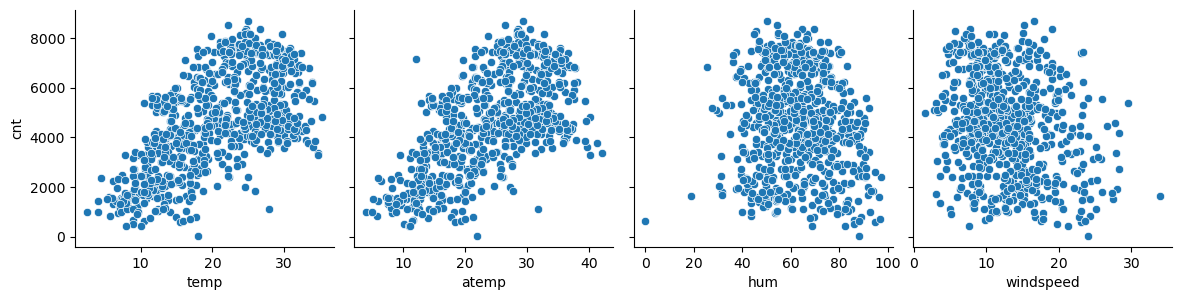

In [59]:
sns.pairplot(Bike_df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',size=3, aspect=1, kind='scatter')
plt.show()

- Target variable has clear linear relation ship with temp, atemp hence Linear Regression Model can be adopted for predictions.

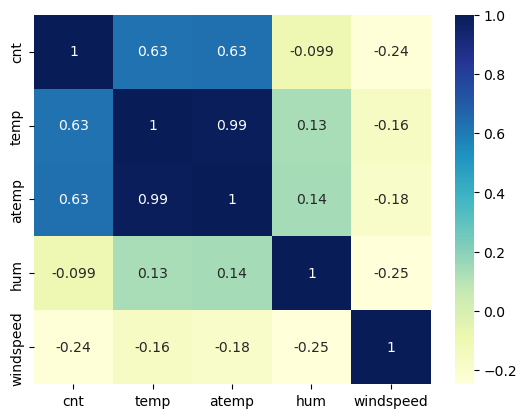

In [60]:
sns.heatmap(Bike_df[Num_vars].corr(),cmap="YlGnBu", annot = True)
plt.show()

## Inferences from Continuous variables

- Target variable 'cnt' is positively corelated with  temp and atemp and negitively with wind speed and hum.

#### Visuvalisation of categorical variables

In [61]:
#sub set the categorical variables and plot box plot .

In [62]:
Cat_vars = ['yr','mnth','holiday','weekday','workingday','season','weathersit']

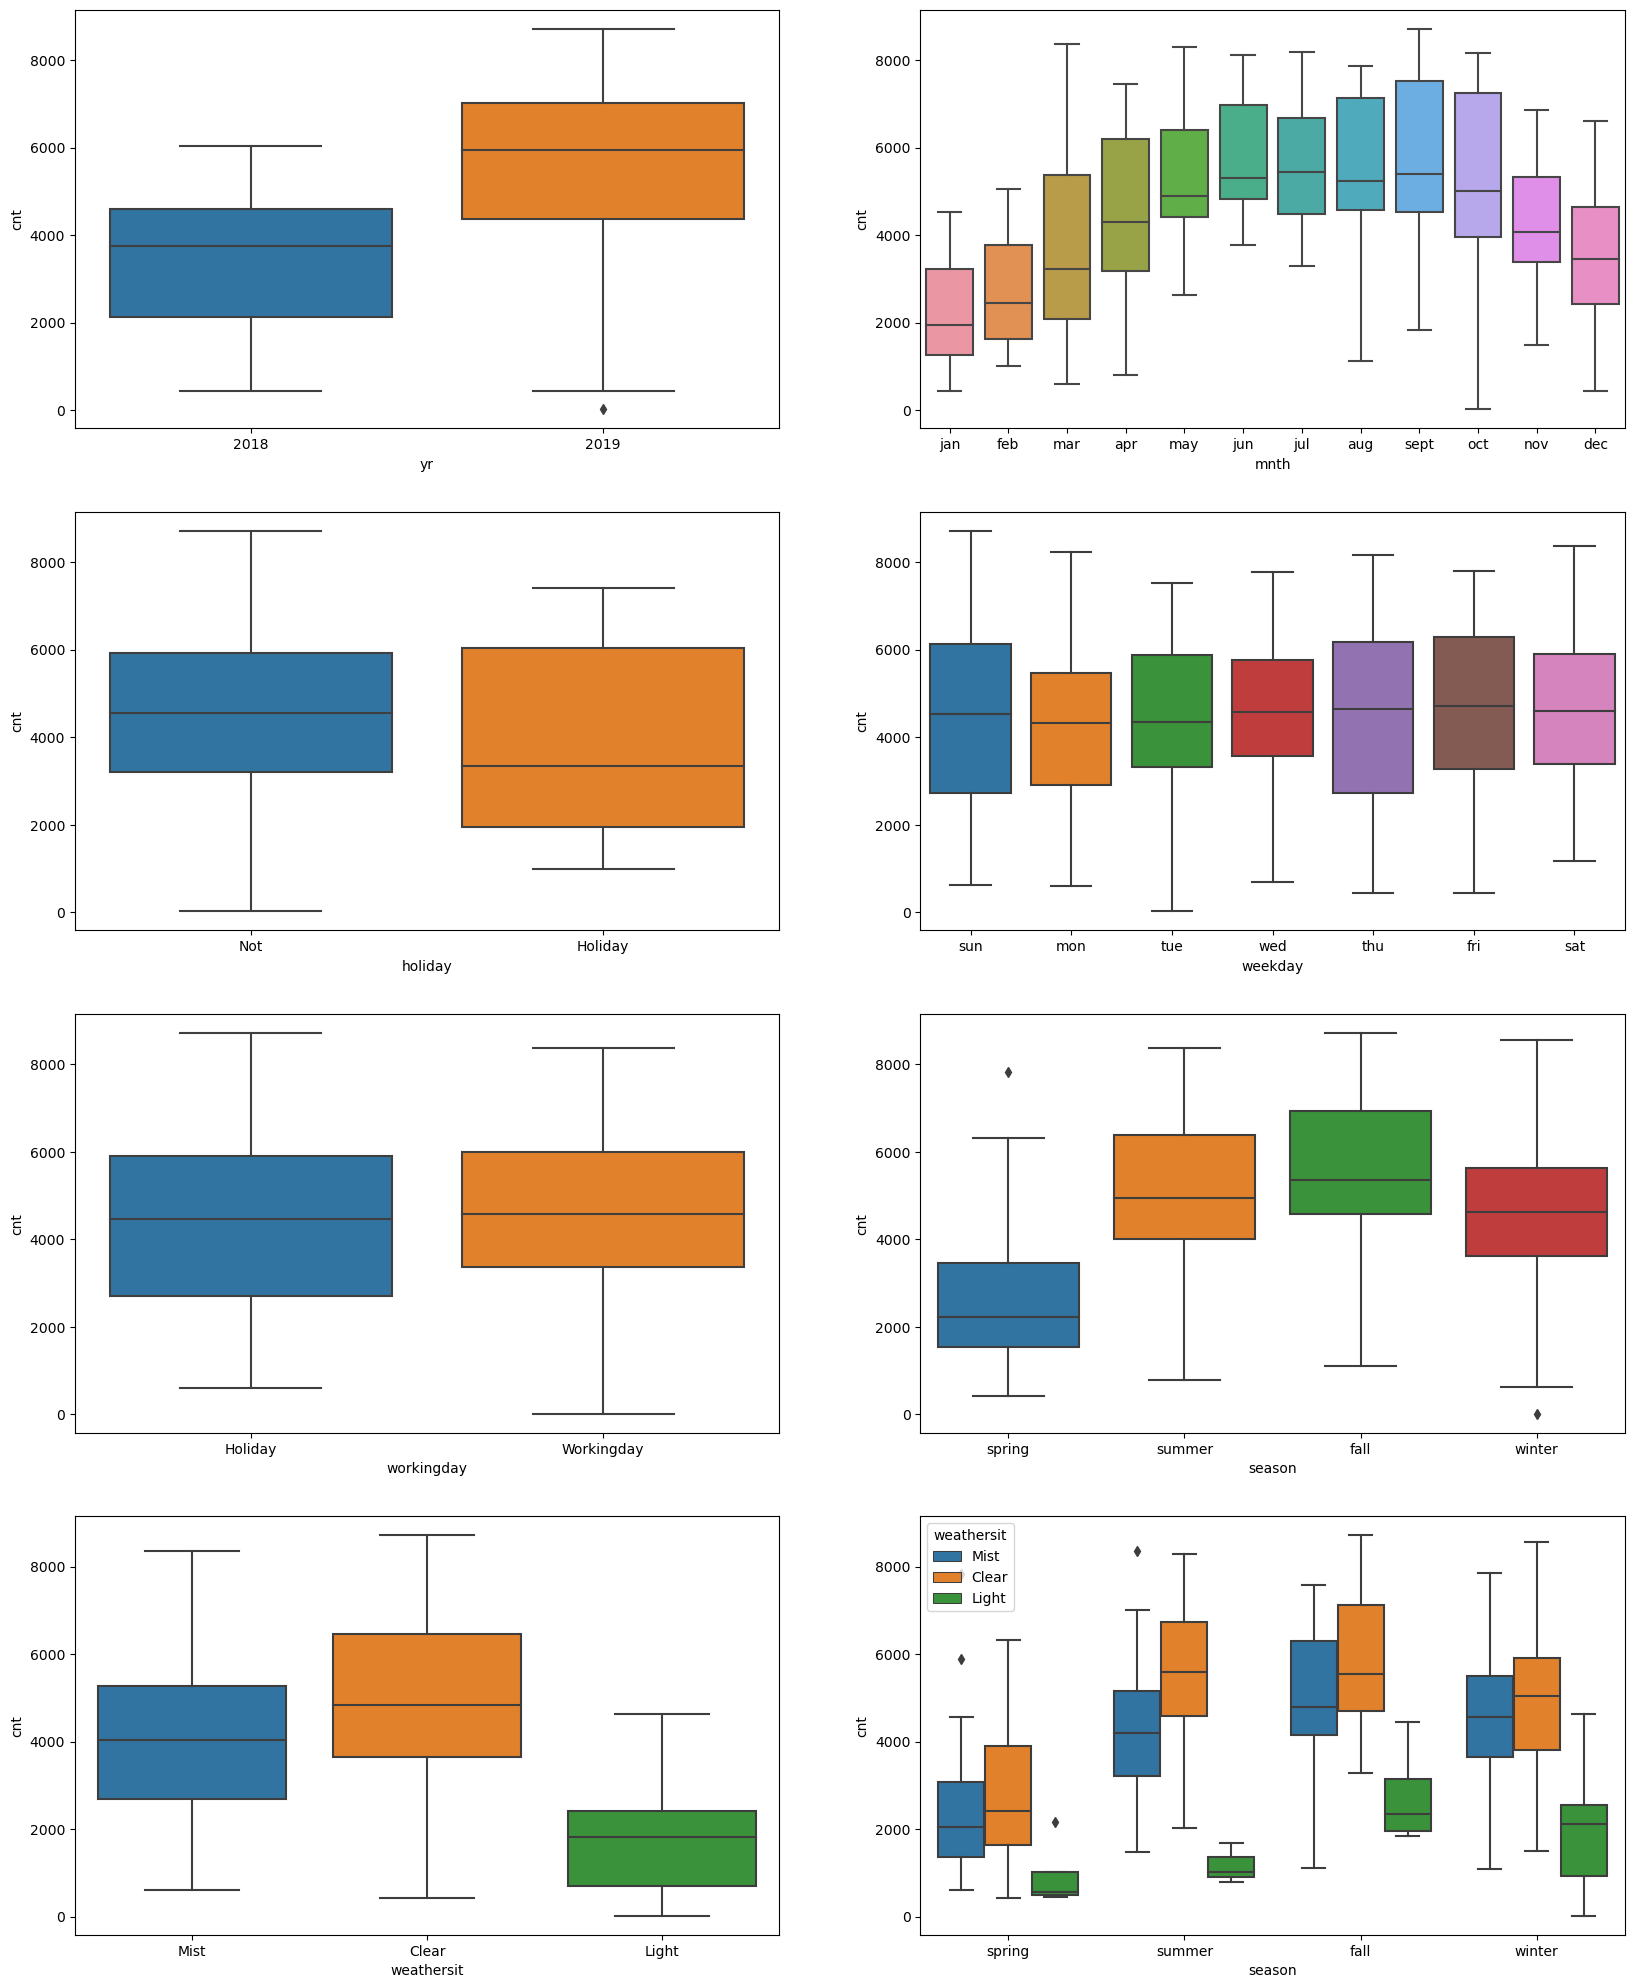

In [63]:
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
sns.boxplot(x='yr',y='cnt',data= Bike_df)
plt.subplot(4,2,2)
sns.boxplot(x='mnth',y='cnt',data= Bike_df)
plt.subplot(4,2,3)
sns.boxplot(x='holiday',y='cnt',data= Bike_df)
plt.subplot(4,2,4)
sns.boxplot(x='weekday',y='cnt',data= Bike_df)
plt.subplot(4,2,5)
sns.boxplot(x='workingday',y='cnt',data= Bike_df)
plt.subplot(4,2,6)
sns.boxplot(x='season',y='cnt',data= Bike_df)
plt.subplot(4,2,7)
sns.boxplot(x='weathersit',y='cnt',data= Bike_df)
plt.subplot(4,2,8)
sns.boxplot(x='season',y='cnt',hue='weathersit',data= Bike_df)
plt.show()

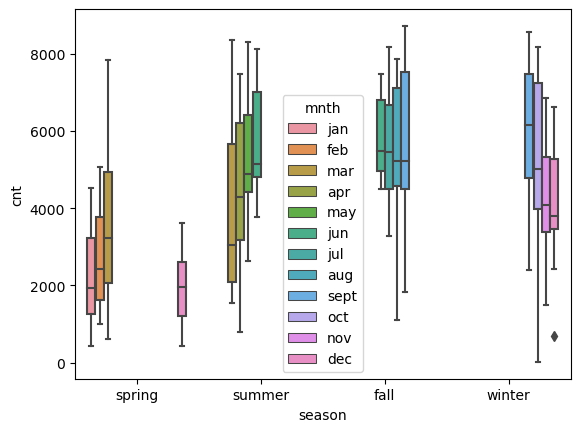

In [64]:
sns.boxplot(x='season',y='cnt',hue='mnth',data= Bike_df)
plt.show()

#### Inferences from Categorical variables

1. Registrations are increased from 2018 to 2019 .
2. Registrations lowest in jan and incresed to maximum between june to sept furthur reduced gradually to dec.
3. During non holidays registratios are more.
4. No significant variation in day wise registrations.
5. No significant variation between weekday and weekend or holiday registrations.
6. Registrations are lowest in spring and increses in summer and become highest in rainy and reduces in winter.
7. Registrations are lowest in light rain or snow or Thunderstorm with partial clouds increased to Mist weather and highest in      Clear weather.
8. Significant variables to consider yr,mnth,holiday,weathersit and season.
9. Out liers are not visible .

## Data Preparation for modelling.

- Encoding Converting binary categorical data vars to 1/0.
- Other categorical variables to dummy variables.

In [65]:
#Read the initial dataframe as Bike_df_original

In [66]:
Bike_df_original= pd.read_csv('day.csv')

In [67]:
Bike_df_original.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Binary categorical variables are yr,holiday and workingday

In [68]:
Bike_df[['yr','holiday','workingday']] = Bike_df_original[['yr','holiday','workingday']]

In [69]:
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sun,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,mon,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


- Other categorical variables season,mnth,weekday and weathersit

#### Creating dummy variables

In [70]:
#Create dummy variables for season,mnth,weekday and weathersit using get_dummies

In [71]:
dummy_vars = ['season','mnth','weekday','weathersit']

In [72]:
dummy_df = pd.get_dummies(Bike_df[dummy_vars])

In [73]:
#dropping redundant variable

In [74]:
dummy_df = pd.get_dummies(Bike_df[dummy_vars], drop_first= True)

In [75]:
dummy_df.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [76]:
#convertion dtype bool to int

In [77]:
dummy_df = dummy_df.astype(int)

In [78]:
dummy_df.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
#adding dummy data frame with Bike_df data frame

In [80]:
Bike_df_new = pd.concat([Bike_df,dummy_df], axis=1)

In [81]:
#dropping original categorical variables

In [82]:
Bike_df_new = Bike_df_new.drop(Bike_df_new[dummy_vars] , axis=1)

In [83]:
Bike_df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Light', 'weathersit_Mist'],
      dtype='object')

In [84]:
#analyse data frame

In [85]:
Bike_df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000
season_spring,730.0,0.246575,0.431313,0.000000,0.000000,0.000000,0.000000,1.000000
season_summer,730.0,0.252055,0.434490,0.000000,0.000000,0.000000,1.000000,1.000000


In [86]:
# import model building and evaluation libraries

In [87]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Splitting the Data into Training and Test sets

In [88]:
df_train , df_test = train_test_split(Bike_df_new, train_size = 0.7 , random_state = 100)

In [89]:
#verify the test and train sets

In [90]:
print(df_train.shape)
print(df_test.shape)
print(Bike_df_new.shape)

(510, 30)
(220, 30)
(730, 30)


### Scaling of Test andTrain Data sets

- Min_Max scaling(normalisation of data between 0 to 1) to avoid Handling of Out_liers
- for train data set fit and transform 
- for test data set only transform

In [91]:
#initiate scaler object

In [92]:
scaler = MinMaxScaler()

In [93]:
Num_vars = ['cnt','temp','atemp','hum','windspeed']

In [94]:
# fit and transform train data and transform test data

In [95]:
df_train[Num_vars] = scaler.fit_transform(df_train[Num_vars])
df_test[Num_vars] = scaler.transform(df_test[Num_vars])

In [96]:
# verify test and train data after scaling

In [97]:
df_train.head(1)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
atemp,510.0,0.513156,0.212410,0.0,0.332086,0.529718,0.688457,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
season_spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
season_summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


In [99]:
df_test.head(1)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
184,0,1,0,0.831783,0.76966,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,1


In [100]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,220.0,0.481818,0.500809,0.000000,0.000000,0.000000,1.000000,1.000000
holiday,220.0,0.036364,0.187620,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,220.0,0.700000,0.459303,0.000000,0.000000,1.000000,1.000000,1.000000
temp,220.0,0.558718,0.233187,0.046591,0.355429,0.558172,0.755981,0.984424
atemp,220.0,0.532847,0.217401,0.025950,0.344870,0.544652,0.713308,0.980934
hum,220.0,0.638221,0.148694,0.261915,0.529197,0.625590,0.743798,1.002146
windspeed,220.0,0.313293,0.159584,-0.042808,0.198843,0.300126,0.402718,0.807474
cnt,220.0,0.522154,0.219163,0.048205,0.378595,0.524678,0.677750,0.963300
season_spring,220.0,0.254545,0.436599,0.000000,0.000000,0.000000,1.000000,1.000000
season_summer,220.0,0.263636,0.441609,0.000000,0.000000,0.000000,1.000000,1.000000


#### Divide X , Ysets for model building

In [101]:
df_Y_train = df_train.pop('cnt')
df_X_train = df_train

### Selection of Features RFE method

In [102]:
# create Lenear regression object

In [103]:
lm = LinearRegression()

In [104]:
# fit train data

In [105]:
lm.fit(df_X_train , df_Y_train )

LinearRegression()

In [106]:
# Create RFE object with 15 features

In [107]:
rfe = RFE(lm , n_features_to_select = 15)

In [108]:
# Run the RFE with 15 features

In [109]:
rfe = rfe.fit(df_X_train , df_Y_train )

In [110]:
list(zip(df_X_train.columns , rfe.support_ , rfe.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 11),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 10),
 ('weathersit_Light', True, 1),
 ('weathersit_Mist', True, 1)]

In [111]:
# RFE supported vaiables

In [112]:
col = df_X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_mon', 'weekday_sun', 'weathersit_Light',
       'weathersit_Mist'],
      dtype='object')

In [113]:
# RFE Not supported vaiables

In [114]:
df_X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_sat',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model  - 1

In [115]:
# Creating X_train data frame with RFE selected variables
X_train_rfe = df_X_train[col]    

In [116]:
def Model(col) :
    X_train_rfe = df_X_train[col]
    # adding a constant
    X_train_rfe = sm.add_constant(X_train_rfe)
    # Run the linear regression model
    lm = sm.OLS(df_Y_train , X_train_rfe).fit()
    # visuvalise parameters
    print(lm.summary())
    

In [117]:
Model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.11e-191
Time:                        17:12:16   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1995      0.028  

- Multicollinearity is present
- holiday Pvalue is high (.386 > .05) hence drop the variable and rebuild the model

In [118]:
# drop the holiday variable

In [119]:
X_train_new = X_train_rfe.drop(['holiday'] , axis = 1)

#### Model  - 2

In [120]:
col = X_train_new.columns
Model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.11e-191
Time:                        17:12:16   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1811      0.042  

- All P values of co-efficients are significant (less than .05),
- R2 value 0.847 also good 
- Prob (F-statistic):	2.11e-191 is very low shows the model is fit. hence Verify Multicollinearity of the model with VIF   values.

In [121]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_mon', 'weekday_sun', 'weathersit_Light', 'weathersit_Mist'],
      dtype='object')

### Computing VIF (Variance Influence Factor between independent variables)

In [122]:
def VIF(col) :
    # create data frame of features with indipendent variables
    vif = pd.DataFrame()
    vif['Features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values , i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values('VIF' , ascending = False)
    print(vif)

In [123]:
VIF(col)

            Features    VIF
3                hum  32.10
2               temp  18.99
1         workingday  18.41
4          windspeed   4.91
11       weekday_sun   4.91
5      season_spring   4.80
10       weekday_mon   4.76
7      season_winter   3.69
6      season_summer   3.04
13   weathersit_Mist   2.31
0                 yr   2.09
8           mnth_jul   1.60
9          mnth_sept   1.38
12  weathersit_Light   1.25


- VIF of hum is high (> 5) hence it is insignificant and drop the hum variable.

In [124]:
# drop the hum variable
X_train_new = X_train_new.drop(['hum'] , axis=1)

### Model  - 3

In [125]:
col = X_train_new.columns
Model(col)
VIF(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          1.28e-188
Time:                        17:12:16   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1008      0.038  

- VIF of workingday is high (>5) hence it is insignificant and drop the workingday variable.

In [126]:
# drop the workingday variable
X_train_new = X_train_new.drop(['workingday'] , axis=1)

### Model  - 4

In [127]:
col = X_train_new.columns
Model(col)
VIF(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.06e-186
Time:                        17:12:16   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2003      0.030  

- weekday_sun P value 0.171 more than .05 so drop weekday_sun variable
- Though VIF of temp is high (>5) P value is more significant than VIF value so drop high P value variable first.

In [128]:
# drop the weekday_sun variable
X_train_new = X_train_new.drop(['weekday_sun'] , axis=1)

### Model  - 5

In [129]:
col = X_train_new.columns
Model(col)
VIF(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          3.37e-187
Time:                        17:12:16   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2034      0.030  

- VIF of temp is high (>5) however in visuvalisation temp variable is highly corelated with cnt so it is importent to keep the variable for prediction of cnt in Model. visuvalize independent variables correlation with temp variable to identify the hihgest correlated variable with temp and drop the same to reduce the multicollinearity effect.

In [130]:
Rfe_vars = ['temp','yr',  'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_mon',
       'weathersit_Light', 'weathersit_Mist']

<Figure size 640x480 with 0 Axes>

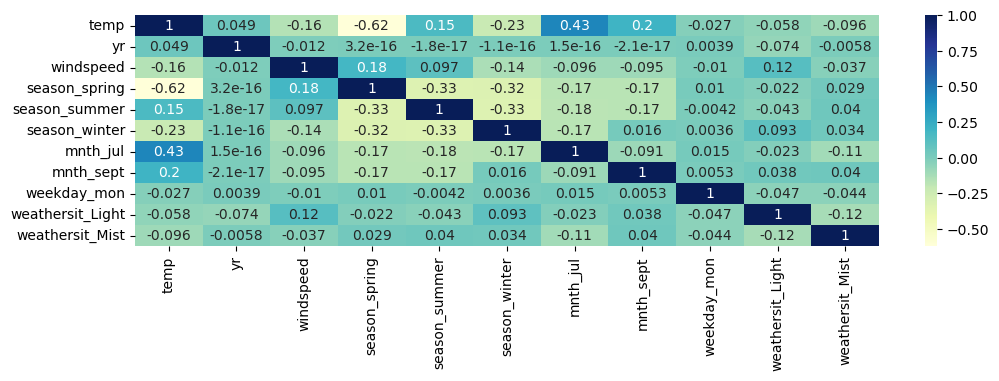

In [131]:
fig = plt.figure()
plt.figure(figsize=(12,3))
sns.heatmap(Bike_df_new[Rfe_vars].corr(),cmap="YlGnBu", annot = True)
plt.show()

- mnth_jul has the highest corelation with temp hense drop the variable.

In [132]:
# drop the mnth_jul variable
X_train_new = X_train_new.drop(['mnth_jul'] , axis=1)

### Model  - 6

In [133]:
col = X_train_new.columns
Model(col)
VIF(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          5.70e-187
Time:                        17:12:17   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1956      0.030  

- All P values of co-efficients are significant (less than .05),
- R2 value 0.833 and R2 adjested 0.830 are very close shows model is fit.
- Prob (F-statistic):5.70e-187 is very low shows the model is fit. 

### Residual Analysis (to verify the model reliability)

- Residues distribution is normal distribution with zero mean value.
- Rsidues or error terms of variables are independent

In [134]:
df_X_train[col].columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_sept', 'weekday_mon', 'weathersit_Light',
       'weathersit_Mist'],
      dtype='object')

In [135]:
# fit data on final Model

In [136]:
# Linear regression object
lm = LinearRegression()
X_train_rfe = df_X_train[col]
# adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)
#Run the linear regression model
lm = sm.OLS(df_Y_train , X_train_rfe).fit()
   

In [137]:
# prediction of 'cnt' in final model
Y_train_pred = lm.predict(X_train_rfe)
# converting 1D series data to 2D data
Y_train_pred = np.array(Y_train_pred).reshape(-1,1)
df_Y_train = np.array(df_Y_train).reshape(-1,1)
# computing of error terms to check the reliability of the model
Res = df_Y_train - Y_train_pred

#### Visuvalise the error terms by plotting histogram and scatter plot

<Figure size 640x480 with 0 Axes>

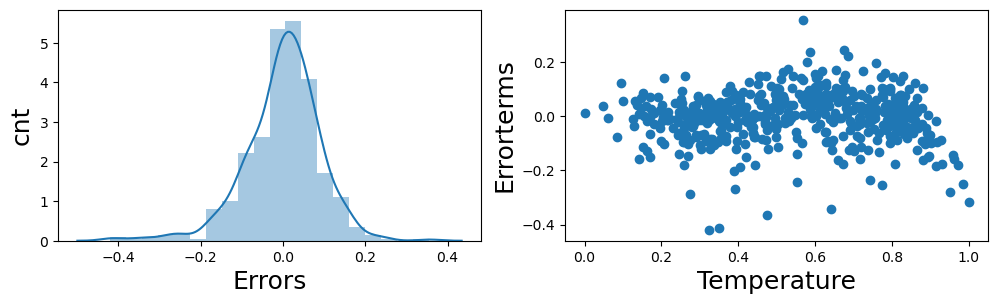

In [153]:
fig = plt.figure()
# plot histogram with probability density function to verify the distribution
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot((df_Y_train - Y_train_pred), bins=20)
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.ylabel('cnt', fontsize=18)
# plot scattor plot of resdues of continuous variable windspeed to verify the spread of error terms
plt.subplot(1,2,2)
plt.scatter(X_train_rfe.temp ,Res )
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Temperature', fontsize=18)
plt.ylabel('Errorterms', fontsize=18)
plt.show()

### Conclustion

- Error terms are normally distributed with Zero mean and error terms spread doesnot show any pattern. Hence the Final model is stable and fit.

## Predictions and Evaluation on test set

#### Divide X , Ysets for model building

In [139]:
Y_test = df_test.pop('cnt')
X_test = df_test[df_X_train[col].columns]

In [140]:
col=X_test.columns

In [141]:
X_test.shape

(220, 10)

In [142]:
# add constant

In [143]:
X_test_sm = sm.add_constant(X_test)

In [144]:
# predict Target variable cnt on test data

In [145]:
Y_test_pred = lm.predict(X_test_sm)

### Model Evaluation

Text(0, 0.5, 'y_pred')

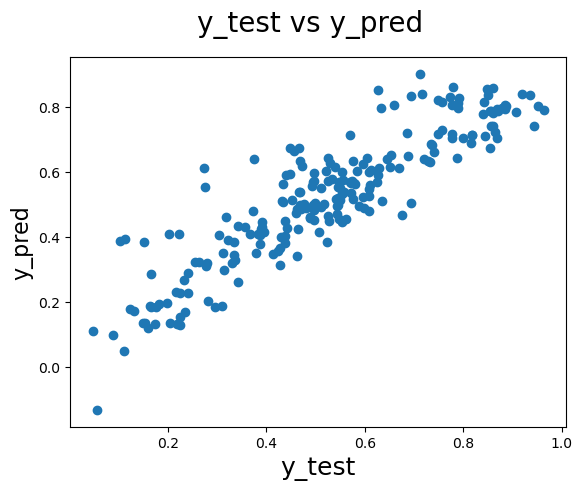

In [146]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- predicted vs actual target variable shows the clear lenear relation ship.

Text(0, 0.5, 'cnt')

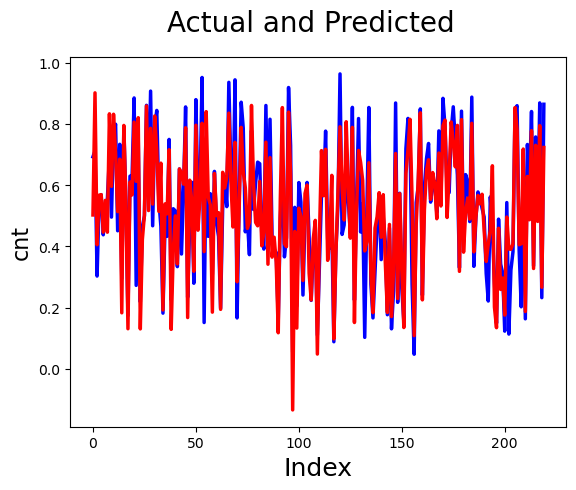

In [147]:
#Actual vs Predicted
c = [i for i in range(X_test.shape[0])]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)                               # Y-label

- he line plot of actuval and predicted very closely imposed one on another shows model is significant.

In [148]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred)

0.8031908103816628

In [149]:
r2_score(df_Y_train, Y_train_pred)

0.8333418171181378

### Model Conclusion

#### visual representation of predictected and actual values on test data and r-squared scores for test and train (very close)  we can conclude that Model learnt from training set will generalize very well on test set also. temp variable effects the most compared to other variables on the Model

### The Equation of best fitted line or cost function

best cnt = 0.1956 + 0.2344 x yr + 0.4795 x temp - 0.1498 x windspeed - 0.0572 x season_spring + 0.0623 x season_summer + 0.0937 x season_winter + 0.0854 x mnth_sept - 0.0461 x weekday_mon - 0.2856 x weathersit_Light - 0.0790 x weathersit_Mist

### Inferences of significant independant variables with target variable from Model

1. temp coefficient is high and +ve shows Registratiions are in high temperatures due to clear weather.
2. light coefficient is 2nd high and -ve shows Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather is not comfortable for bike riding hence bike registrations are impacted.
3. yr coefficient is 3rd high and +ve shows Bike sharing registrations are incresed from 2018 to 2019 in covid season as people are prefered to use bikes than public transport.
4. Wind speed coefficient is 4th highest and -ve shows  bike riding is difficult hence registrations are impacted.
5. spring coefficient -ve shows In USA During the spring, temperatures begin to warm up and thunderstorms and rainstorms are common across the country hence bike registrations are negitively corelated.
6. summer coefficient +ve shows In summer more people prefer to ride on bikes.
7. sepember coefficient +ve showsIn september month bike registrations are more because more pepole prefer vacation trips on bikes.
8. Mist coefficient -ve shows mist weather is not comfortable for bike riding hence bike registrations are impacted.

In [150]:
col

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_sept', 'weekday_mon', 'weathersit_Light',
       'weathersit_Mist'],
      dtype='object')

In [151]:
significant_vars = ['cnt','yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter',  'mnth_sept', 'weekday_mon',
       'weathersit_Light', 'weathersit_Mist']

<Figure size 640x480 with 0 Axes>

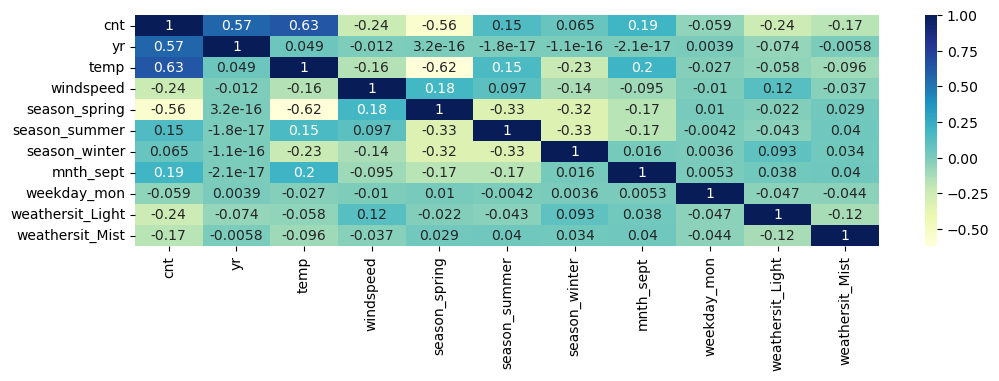

In [152]:
fig = plt.figure()
plt.figure(figsize=(12,3))
sns.heatmap(Bike_df_new[significant_vars].corr(),cmap="YlGnBu", annot = True)
plt.show()